In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [12]:
x_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

x_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train_rsh = x_train.reshape(-1, 28, 28, 1)
x_test_rsh = x_test.reshape(-1, 28, 28, 1)

In [15]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [17]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

C:\Users\Shrutika\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train_rsh, y_train_cat, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7223 - loss: 0.7747 - val_accuracy: 0.8627 - val_loss: 0.3825
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8659 - loss: 0.3747 - val_accuracy: 0.8805 - val_loss: 0.3289
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8817 - loss: 0.3199 - val_accuracy: 0.8978 - val_loss: 0.2880
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8944 - loss: 0.2893 - val_accuracy: 0.9022 - val_loss: 0.2710
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9053 - loss: 0.2600 - val_accuracy: 0.8973 - val_loss: 0.2678
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9116 - loss: 0.2415 - val_accuracy: 0.9045 - val_loss: 0.2613
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9182 - loss: 0.2224 - val_accuracy: 0.9148 - val_loss: 0.2414
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9227 - loss: 0.2053 - 

In [21]:
loss, accuracy = model.evaluate(x_test_rsh, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9191 - loss: 0.2776


In [22]:
loss

0.27173906564712524

In [23]:
accuracy

0.9212999939918518

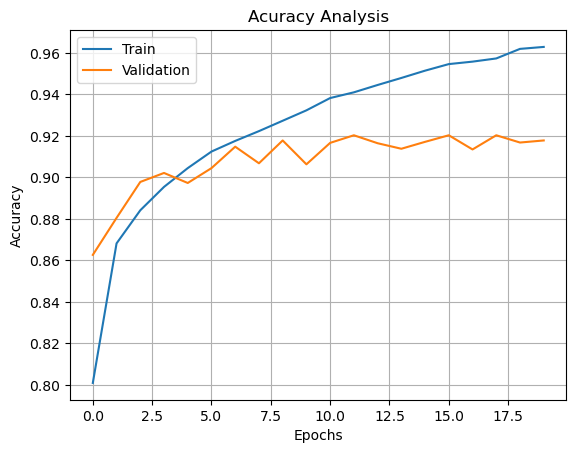

In [24]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Acuracy Analysis")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()